In [1]:
import torch

/home/salvatore.milite/miniconda3/envs/scdeepaa/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append("../src/")

%load_ext autoreload
%autoreload 2

import scdeepaa

# Get started with scRNA-seq




In [3]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
adata =  sc.datasets.pbmc3k_processed()
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Here we use a

In [5]:
input_matrix, norm_factor, distribution_type = scdeepaa.get_input_params_adata(adata)

In [6]:
adata.X.shape

(2638, 1838)

In [15]:
res = scdeepaa.fit_deepAA(
    [adata.X],
    [np.ones(adata.X.shape[0])],
    ["G"],
    hidden_dims_dec_common = [256,256],
    hidden_dims_dec_last = [512],
    hidden_dims_enc_ind = [512],
    hidden_dims_enc_common = [256,256],
    hidden_dims_enc_pre_Z = [128, 64],
    lr = 0.01,
    gamma_lr = 0.01,
    steps = 1000,
    narchetypes = 5,
    batch_size = 3000,
    fix_Z = True)

ELBO: 156688061.19174  : 100%|██████████| 1000/1000 [00:13<00:00, 75.27it/s]


In [16]:
adata, arc_names = scdeepaa.add_to_obs_adata(res, adata)

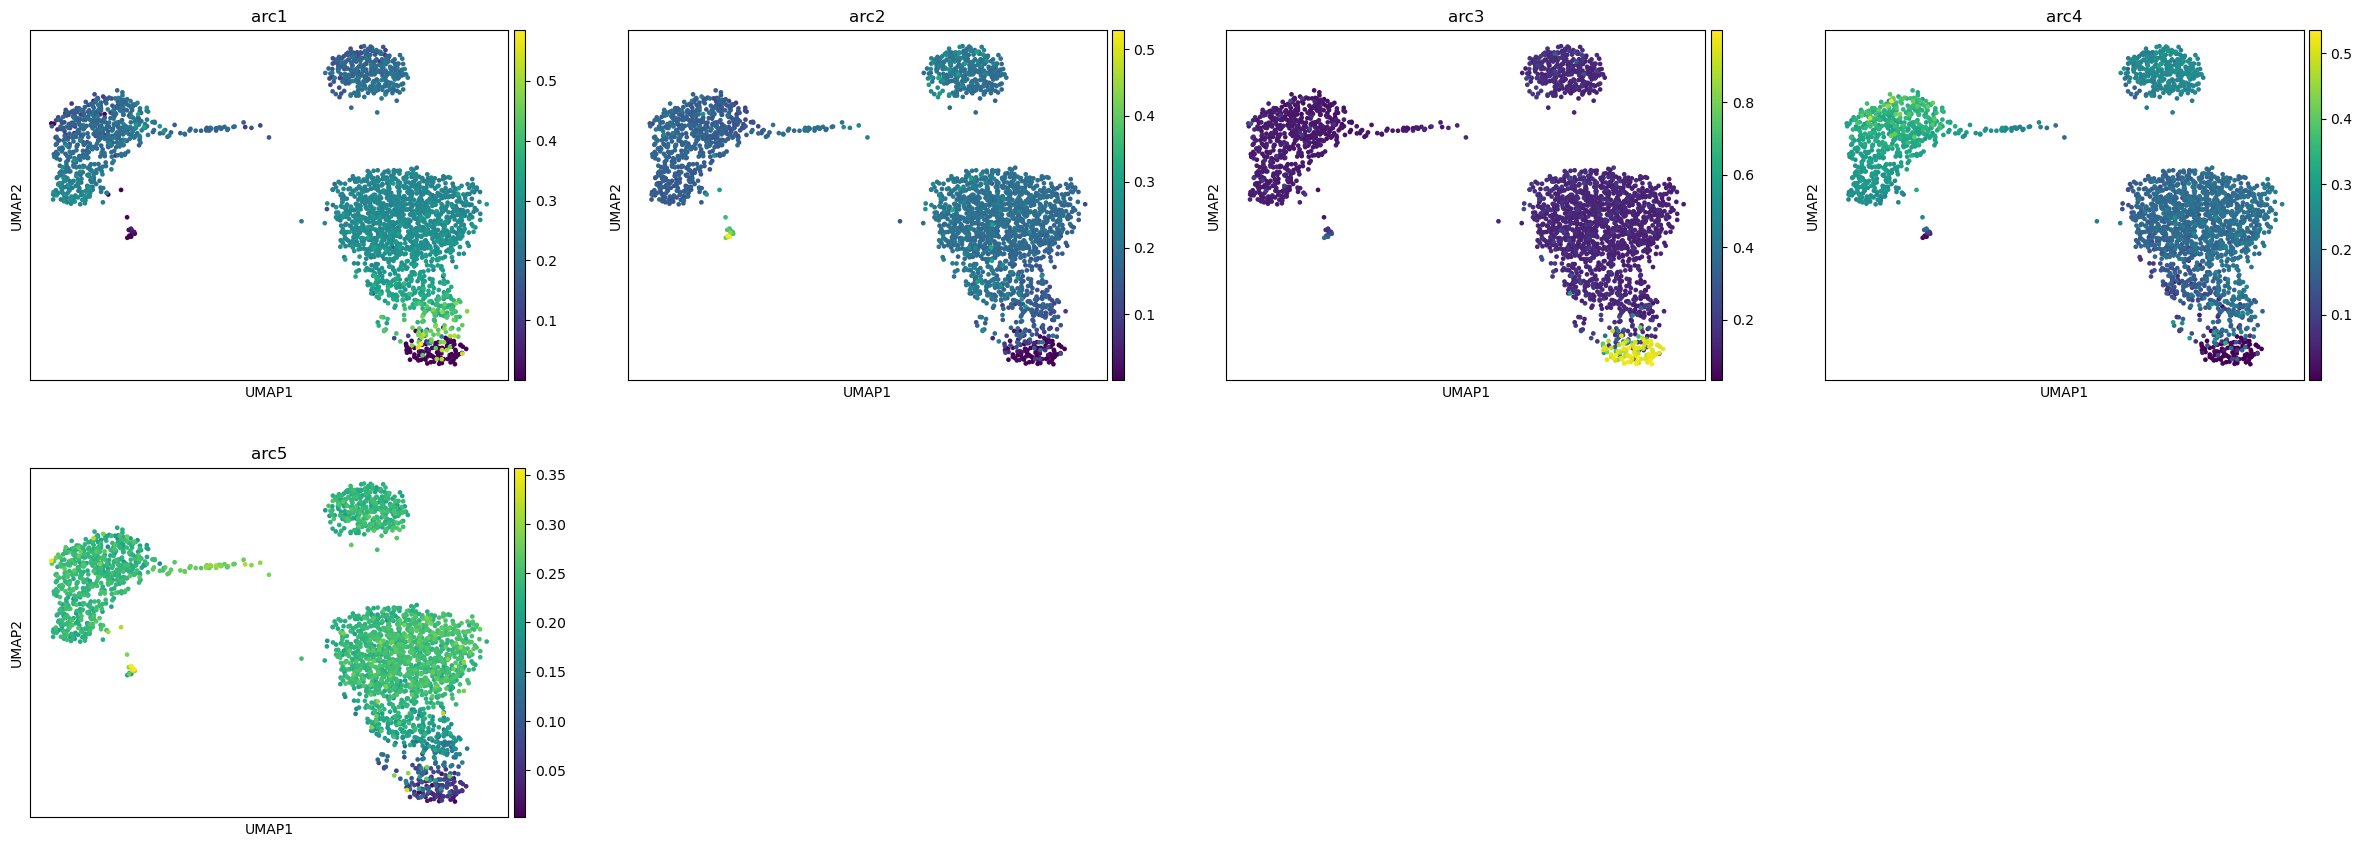

In [22]:
sc.pl.umap(adata, color=arc_names)

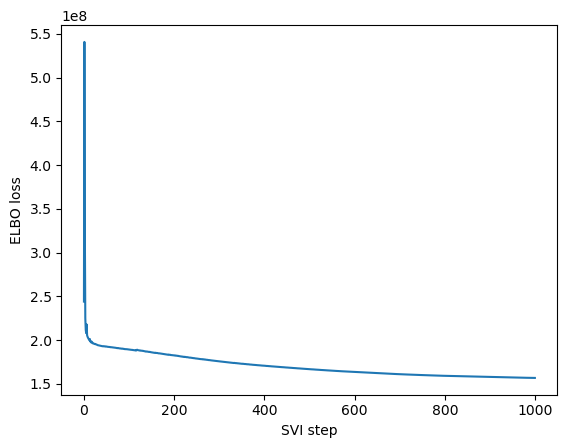

In [18]:
scdeepaa.plot_ELBO(res)

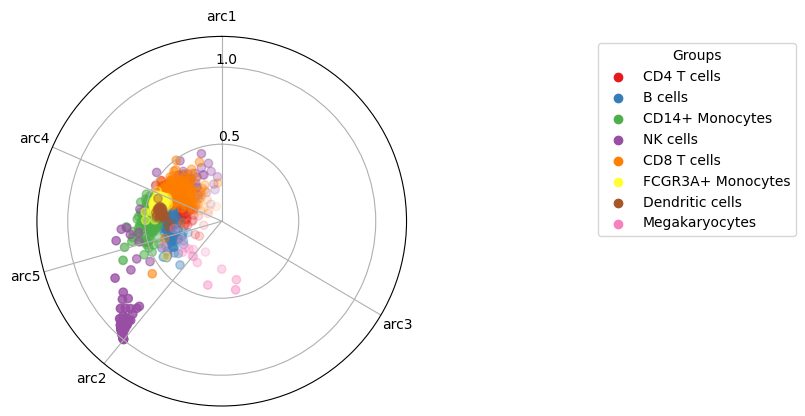

In [19]:
scdeepaa.plot_archetypes_simplex(res, color_by = adata.obs["louvain"], cmap = "Set1")

In [20]:
res["inferred_quantities"]["Z_loss"]

array(9.975864e+09, dtype=float32)

In [21]:
res["inferred_quantities"]["input_loss"]

array(-3.646315e+08, dtype=float32)